In [1]:
#RUN THIS BEFORE USING
%reset
%matplotlib inline
import network_modules as nm
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import networkx as nx
import collections
import scipy.signal as sig

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
def degree_distribution(G):    
    degree_sequence=sorted([d for n,d in G.degree().items()], reverse=True) # degree sequence
    degreeCount=collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.plot(deg, cnt,'.')

    plt.title("Degree Distribution")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks([d+0.4 for d in deg])
    ax.set_xticklabels(deg)

    # draw graph in inset
    plt.axes([0.4, 0.4, 0.5, 0.5])
    ax.set_yscale('log')
    ax.set_xscale('log')
    plt.axis('off')
    plt.show()

In [69]:
# Equality Functions: Measures grah similarity

def jaccard(A, B):
    A = A.tolist()
    B = B.tolist()
    andsum = sum([sum([i and j for i,j in zip(a,b)]) for a,b in zip(A,B)])
    orsum = sum([sum([i or j for i,j in zip(a,b)]) for a,b in zip(A,B)])
    return andsum/orsum

def cosine(A,B):
    A = A.tolist()
    B = B.tolist()
    mag = lambda x: np.sqrt(np.dot(x,x))
    return 1 - (sum([1 - (np.dot(a,b)/(mag(a)*mag(b))) for a,b in zip(A,B)])/len(A))

def distance(A,B):
    dis = sum([sum(x) for x in abs(A-B).tolist()])
    return 1 - (dis/len(A))**2

SyntaxError: invalid syntax (<ipython-input-69-8c40014a191f>, line 16)

In [61]:
#runs functions across all signals and outputs matrix of results

def cross_func(states, func):
    M = np.zeros((len(states), len(states)))
    for i in range(len(states)):
        for j in range(len(states)):
            if i != j:
                M[i,j] = func(states[i,:],states[j,:])
    return np.matrix(M)

In [5]:
#Source: https://github.com/scikit-learn/scikit-learn/blob/14031f6/sklearn/metrics/cluster/supervised.py#L531
#Mutual Information 

In [100]:
#PS
def phase_synchrony(x,y):
    ps = np.mean(abs((x+y)))/2
    return ps

In [105]:
#correlation
cor = lambda x,y: np.correlate(np.array(x)[0],np.array(y)[0])[0]/(len(np.array(x)[0]))

In [81]:
#coherence
coh = lambda x,y: max(sig.coherence(np.array(x)[0],np.array(y)[0])[1])

In [9]:
#Nonlinear measures
#import nolds.sampen as as sp
#import nolds.corr_dim as cd
#import nolds.lyap_r as lp

In [10]:
#Granger Causality
#import nitime.analysis.granger as GC

In [11]:
slider1 = widgets.IntSlider(min=50, max=5000, step=50, value= 50, description = 'n')
slider2 = widgets.IntSlider(min=1, max=10, value=1, description = 'm')
slider3 = widgets.FloatSlider(min=0, max=10, value=1, description = 'a')
slider4 = widgets.FloatSlider(min=0, max=2*np.pi, value=0, description = 'b')
slider5 = widgets.FloatSlider(min=0, max=1, value=0, description = 'c')
slider6 = widgets.FloatSlider(min=0, max=10, value=1, description = 'K')
display(slider1, slider2, slider3, slider4, slider5,slider6)

In [12]:
n = slider1.value
m = slider2.value
print('n = ',n)
print('m = ',m)
G = nm.create_network('BA',n,m)

n =  50
m =  1


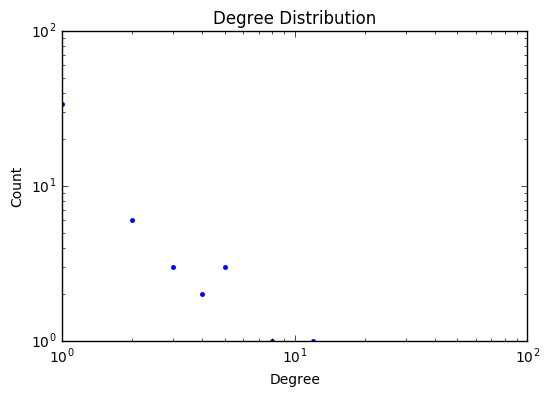

In [13]:
degree_distribution(G)

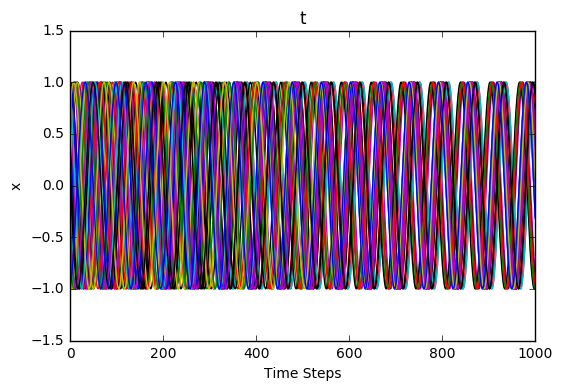

In [14]:
#Parameter Initialization

distributions = [(n,0,2*np.pi,'uniform')]
phase = nm.create_vec_states(distributions)
x = np.cos(phase) + np.sin(phase)*1j

def h(x):   #node function
    w = 10
    return 1j * x * w + x*(1-abs(x)) # apply limit cycle term to keep in a circle

def f(x,y): #coupling function
    a = slider3.value
    b = slider4.value
    c = slider5.value
    K = slider6.value
    phi = np.angle(y[0])-np.angle(x[0])
    return 1j * x * complex(K*(np.sin(a*phi+b)+c),0)

M = np.identity(n) #Measurement Matrix
N = 0 #Noise Variance

oscillator = nm.nmodel(G,x,h,f,M,N,dt=.01)
oscillator.run(10)
nm.state_course(np.real(nm.reduce_state(0,oscillator.x)))

[[ 0.          0.97859303  0.5020295  ...,  0.71328668  0.58956879
   0.98511456]
 [ 0.97859303  0.          0.62368801 ...,  0.67376973  0.68409489
   0.98384462]
 [ 0.5020295   0.62368801  0.         ...,  0.69106827  0.91961348
   0.52825549]
 ..., 
 [ 0.71328668  0.67376973  0.69106827 ...,  0.          0.58709415
   0.74129995]
 [ 0.58956879  0.68409489  0.91961348 ...,  0.58709415  0.          0.55528122]
 [ 0.98511456  0.98384462  0.52825549 ...,  0.74129995  0.55528122  0.        ]]


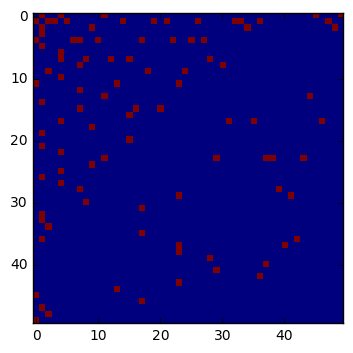

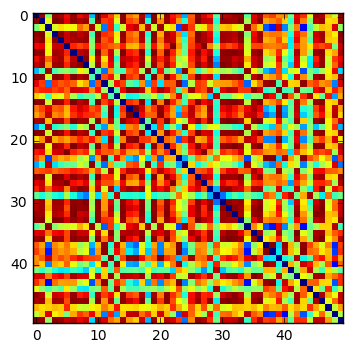

In [102]:
nm.plt_graph(oscillator.G)
plt.figure()
x = cross_func(nm.reduce_state(0,oscillator.x),phase_synchrony)
plt.imshow(x, interpolation= "nearest")
print(x)


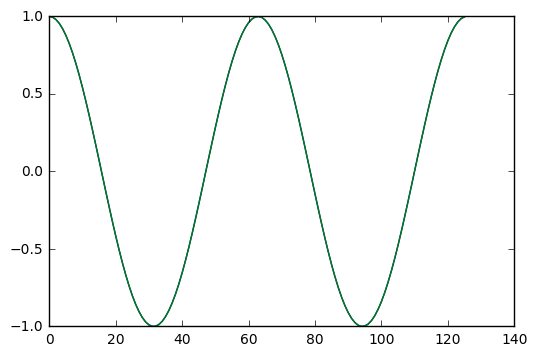

(1+0j)


In [104]:
def frange(start, stop, step):  
    i = start
    while i < stop:
        yield i
        i += step
        
@interact(off = (0.0,2*np.pi))
def f(off):
    x = np.matrix([np.cos(x) + 1j*np.sin(x) for x in frange(0,4*np.pi,.1)])
    y = np.matrix([np.cos(x + off) + 1j*np.sin(x + off) for x in frange(0,4*np.pi,.1)])
    plt.figure()
    plt.plot(np.array(x)[0])
    plt.plot(np.array(y)[0])
    plt.show()
    print(cor(x,y))
    